<h1>Práctica de Fundamentos de Data Science</h1>
<p/>
<table border>
<tr><td>Alumno</td><td>email</td><td>Teléfono</td></ur>
<tr><td>José María Álvarez</td><td>josemaria.alvarezfernandez@elcorteingles.es</td><td>+34 647 471 225</td></ur>
<tr><td>Adolfo González</td><td>adolfo.gonzalez@elcorteingles.es</td><td>+34 673 333 347</td></ur>
<tr><td>César Colado</td><td>cesar.colado@elcorteingles.es</td><td>+34 661 415 555</td></ur>
</table>

<h1>Días de venta especial en un 'retailer'</h1>
<p/>
En un retailer como <b1>El Corte Inglés</b1>, llamamos días de venta especial a períodos como la camapaña navideña, la Semana Santa, un Black Friday, Las Rebajas de Enero, etc.
<p/>
Durante estos períodos la venta suele múltiplicarse, pero no es siempre lineal y la tendencia no siempre es fácil de predecir. Son muchas las incógnitas que debemos resolver para poder estimar el 'stock' del que se debe hacer provisión en la tienda, el número de empleados que debemos tener en cada departamento en los días de más afluencia de clientes, número de servidores o ancho de banda que debemos tener preparados para resolver toda la demanda online, etc.
<p/>
Como es de nuestro interés, hemos seleccionado un conjunto de datos de una empresa de retail 'un poco' mayor que El Corte Inglés, con origen en Estados Unidos y que se enfrenta a problemas similares.

<img src='http://media.graytvinc.com/images/810*455/WRM+Walmart+WEB.jpg' alt='Walmart' height='400' width='4000'>


Walmart es un 'retailer' con origen en Estados Unidos que emplea a más de dos millones de empleados. Como El Corte Inglés, se enfrenta a un desafío en cada período de venta especial para dimensionar sus recursos de forma eficiente.

<img src="https://boygeniusreport.files.wordpress.com/2015/11/black-friday-shoppers1.jpg?quality=98&strip=all"
alt="Recursos mal estimados en Walmart"/>

Hemos conseguido un conjunto de datos de Walmart que trataremos de utilizar para hacer un análisis de las necesidades de este "retailer" en periódos de venta especial.</p>
<a target="_blank" href="https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting">Datos de Walmart</a>

¿Cómo abordar este problema de negocio? La propuesta es aprender de los datos, mediante minería de datos y descubrimiento de conocimiento, para lo que aplicaremos la metodología estándar de facto: 
<p>CRISP-DM</p> ("Cross Industry Standard Process for Data Mining")<p/>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/1024px-CRISP-DM_Process_Diagram.png" alt="diagrama explicativo de CRISP-DM" height="400" width="400"/><p/>
Esta metodología iterativa, diferencia seis fases en cada ciclo, a saber:<p/>
<li>Comprensión del negocio</li>
<li>Comprensión de datos</li>
<li>Preparación de datos</li>
<li>Modelado</li>
<li>Evaluación</li>
<li>Despliegue</li>


<h1>Fase I. Comprensión del negocio</h1>
//FIXME.ccolado Relacionar con la primera parte y la comprensión de los datos de la fase II

El objetivo es tratar de ser capaces de tener una previsión de ventas para poder hacer el acopio de recursos que necesitamos por tienda y departamento.


<h1>Fase II. Comprensión de los datos</h1>

Tenemos datos de 45 tiendas localizadas en diferentes zonas geográficas. En cada tienda tenemos unos departamentos concretos. Además, tendremos en cuenta ciertas acciones promocionales que Walmart lleva a cabo a lo largo del año. En Estados Unidos las principales periodos promocionales son:
<ol>
<li>Super Bowl. Como aquí la final de la Copa del Rey</li>
<li>El día del trabajo</li>
<li>Acción de Gracias. Es cuando comen el pavo y se juntan en familia</li>
<li>Navidad. Pues eso, Navidad</li>
</ol>
<p/>
Las semanas que incluyen estos períodos se les da un peso cinco veces mayor que al resto.
<p/>
Tenemos cuatro ficheros de datos:
<ol type=A>
<li>stores.csv - Información anónima sobre 45 tiendas, con tipo y tamaño de la tienda</li>
<li>train.csv - Datos históricos que cubren desde el 05/02/2010 hasta el 01/11/2012. Estos datos incluyen la tienda, el departamento, la semana de venta y la venta de esa semana. Además, también se incluye una marca que nos indica si era o no una semana festiva.</li>
<li>features.csv - Datos adicionales relativos a la tienda, con información como la temperatura, el precio de la gasolina, el precio de índice al consumo y la tasa de desempleo por semana.</li>
</ol>

Para poder acceder a los datos de forma sencilla, hemos subido los ficheros que nos facilita Kaggle a un proyecto de GitHub. 

El proyecto lo puedes encontrar en el siguiente enlace: https://github.com/ccolado/master-big-data-walmart
El objetivo es que sea sencillo acceder a los ficheros planos con los datos en formato raw, que encontrarás en los siguientes enlaces:

<table class="egt">
  <tr>
    <td>stores.csv</td><td>https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/stores.csv</td>
  </tr>
  <tr>
    <td>train.csv</td><td>https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/train.csv</td>
  </tr>
  <tr>
    <td>features.csv</td><td>https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/features.csv</td>
  </tr>
</table>

<h1>Fase III. Preparación de datos</h1>

Comenzaremos por el primer fichero, los datos maestros de tienda. Lo cargaremos desde el proyecto de GitHUb donde no es necesario autenticarse para cargarlo y revisaremos los datos que tenemos. 

Recuerda que tenemos datos de 45 tiendas y que en este fichero tenemos el tipo de tienda y un número que nos da una idea del tamaño de la tienda. El fichero tiene cabeceras y es un CSV (Comma Separated Values), por lo que indicaremos eso al cargar el fichero en nuestro dataFrame:

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/stores.csv"
stores = pd.read_table(url,sep=',')
stores.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


Entre los datos de tienda no parece haber ninguno vacío, pero comprobaremos cuántas tiendas diferentes hemos cargado para estar seguros de que tenemos las 45.

In [2]:
stores.Store.count()

45

Revisemos que no tenemos información repetida de tiendas:

In [3]:
len(stores.Store.unique())

45

¡Genial! Tenemos 45 tiendas. Dado que están anonimizadas, no tienemos información de por ejemplo la tienda "Castellana" o "Diagonal". Las tiendas se identifican con un número: tienda 1, tienda 2, ... tienda 45. El índice que nos ha aplicado la función de carga es estándar en python, comienza en 0 y termina en 44. <p/>
Nos va a resultar mucho más sencillo para referirnos a una tienda indexar por su número de tienda, es decir, indexar por tienda 1 para saber el tamaño o su tipo. Por este motivo modificaremos el índice para colocar el número de tienda como índice en nuestro df: stores

In [4]:
stores.index = stores.Store
stores.head(3)

,Store,Type,Size
Store,,,
1,1,A,151315
2,2,A,202307
3,3,B,37392


El tamaño que nos han dado es en pies cuadrados y para hacernos mejor idea, e interpretar los datos mucho mejor, lo pasaremos a metros cuadrados:

In [5]:
stores.Size = stores.Size * 0.092903
stores.head(3)

,Store,Type,Size
Store,,,
1,1,A,14057.617445
2,2,A,18794.927221
3,3,B,3473.828976


Por curiosidad, averigüemos el tamaño medio de nuestras tiendas:

In [6]:
stores.Size.mean()

12104.108902799995

La media de las muestras que tenemos es de 12.104 metros cuadrados. Y tenemos tiendas de tipo A, tipo B y tipo C

In [7]:
stores.Type.describe()

count     45
unique     3
top        A
freq      22
Name: Type, dtype: object

¿Cuántas tiendas tenemos de tipo A? ¿cuántas de tipo B? ¿cuántas de tipo C?

In [8]:
grouped = stores[['Type','Store']].groupby('Type').count()
grouped

,Store
Type,
A,22
B,17
C,6


Para poder hacer algunas agrupaciones, vamos también a crear un objeto dataFrame utilizando un multi-índice. Para ello construiremos el índice con el tipo de tienda y el número de tienda y le llamaremos "stores_by_type".

In [9]:
stores = stores.sort_values(['Type','Store'], ascending=True)
stores

,Store,Type,Size
Store,,,
1,1,A,14057.617445
2,2,A,18794.927221
4,4,A,19125.290289
6,6,A,18813.322015
8,8,A,14407.211434
11,11,A,19277.279597
13,13,A,20403.542666
14,14,A,18664.026894
19,19,A,18935.396557


In [10]:
multi_index = pd.MultiIndex.from_arrays([stores.Type,stores.Store],names=['Type','Store'])
stores_by_type = stores.Size
stores_by_type.index=multi_index
stores_by_type

Type  Store
A     1        14057.617445
      2        18794.927221
      4        19125.290289
      6        18813.322015
      8        14407.211434
      11       19277.279597
      13       20403.542666
      14       18664.026894
      19       18935.396557
      20       18928.243026
      24       18935.396557
      26       14168.915239
      27       18969.306152
      28       19166.074706
      31       18928.986250
      32       18859.959321
      33        3687.320070
      34       14689.264942
      36        3707.758730
      39       17104.278427
      40       14407.675949
      41       18238.809863
B     3         3473.828976
      5         3239.992125
      7         6569.449839
      9        11690.263199
      10       11753.344336
      12       10427.246914
      15       11495.538511
      16        5313.772891
      17        8657.444764
      18       11209.025659
      21       13021.934801
      22       11107.203971
      23       10640.459299
      25

In [11]:
stores_by_type['A'].describe()

count       22.000000
mean     16466.845607
std       4588.722678
min       3687.320070
25%      14478.073197
50%      18804.124618
75%      18935.396557
max      20403.542666
Name: Size, dtype: float64

In [12]:
stores_by_type['B'].describe()

count       17.000000
mean      9400.920149
std       3007.375826
min       3239.992125
25%       8657.444764
50%      10640.459299
75%      11495.538511
max      13021.934801
Name: Size, dtype: float64

In [13]:
stores_by_type['C'].describe()

count       6.000000
mean     3766.442458
std       121.158986
min      3687.320070
25%      3692.429735
50%      3707.758730
75%      3788.026922
max      3993.714164
Name: Size, dtype: float64

Ahora deberíamos hacer lo mismo con los datos que se identifican en el fichero <b>train.csv</b>. Este fichero contiene los datos de las ventas por departamento y tienda por semanas, sabiéndose además si cada semana es un período vacacional o no.


In [14]:
url = "https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/train.csv"
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')

walmart_data = pd.read_table(url,sep=',',parse_dates=['Date'], date_parser=dateparse)
walmart_data.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


Haciendo una rápida inspección, podemos ver que no hay datos repetidos de venta en la tupla Tienda, Departamento y Fecha.

In [15]:
walmart_data[walmart_data.duplicated(subset=["Store", "Dept", "Date"], keep=False)]

,Store,Dept,Date,Weekly_Sales,IsHoliday


Sin embargo, tenemos tiendas que tienen ventas negativas. Podrían tratarse de días en los que hay más abonos que ventas, pero entenderemos que las ventas negativas no son posibles, con lo cual esas filas no las vamos a considerar.

In [16]:
walmart_data.sort_values(by='Weekly_Sales').head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
267730,28,6,2010-10-08,-4988.94,False
336495,35,47,2011-09-02,-3924.00,False
417801,45,47,2010-02-26,-1750.00,False


In [17]:
clean_walmart_data = walmart_data[walmart_data.Weekly_Sales >= 0]
clean_walmart_data.sort_values(by='Weekly_Sales').head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
262790,27,47,2012-08-24,0.0,False
394727,42,44,2012-10-05,0.0,False
25448,3,36,2012-08-17,0.0,False


Si sacamos el número de semanas que tenemos en el dataset, podríamos echar un primer vistazo a cuales son el top 10 de tiendas que más venden dentro de Walmart de forma semanal de media, en millones de dolares.

In [19]:
number_of_weeks = len(clean_walmart_data.Date.unique())
top_ten = (clean_walmart_data[["Store", "Weekly_Sales"]].groupby(["Store"]).sum()/number_of_weeks).sort_values(by='Weekly_Sales', ascending=False).head(10)
top_ten['Weekly_Sales_InMillions']='$' + (round(top_ten['Weekly_Sales']/1000000, 2)).astype(str) + 'M'
top_ten.Weekly_Sales_InMillions

Store
20    $2.11M
4     $2.09M
14    $2.02M
13     $2.0M
2     $1.93M
10     $1.9M
27    $1.78M
6     $1.56M
1     $1.56M
39    $1.45M
Name: Weekly_Sales_InMillions, dtype: object

Tambien podríamos ver cuales son los departamentos que más venden globalmente dentro de Walmart, por semana.

In [20]:
top_ten_dept = (clean_walmart_data[["Dept", "Weekly_Sales"]].groupby(["Dept"]).sum()/number_of_weeks).sort_values(by='Weekly_Sales', ascending=False).head(10)
top_ten_dept['Weekly_Sales_InMillions']='$' + (round(top_ten_dept['Weekly_Sales']/1000000, 2)).astype(str) + 'M'
top_ten_dept.Weekly_Sales_InMillions

Dept
92    $3.38M
95    $3.14M
38    $2.75M
72    $2.14M
90    $2.04M
40    $2.02M
2     $1.96M
91    $1.52M
13    $1.38M
8     $1.36M
Name: Weekly_Sales_InMillions, dtype: object

Ahora vamos a intentar un análisis exploratorio algo más complejo. Vamos a pintar las ventas de las 5 tiendas que más venden, que obtuvimos anteriormente, agrupadas por mes. Para ello, vamos a hacer varios pasos:
<ul>
  <li>Agrupamos por tienda y por fecha, y sumamos las ventas, para sacar ventas totales</li>
  <li>Después preparamos un gráfico donde creamos 5 lineas diferentes para cada una de las tiendas mencionadas y pintamos su linea, dandole un color diferente, y rotando la fecha para que se vea bien</li>
  <li>Hay que fijarse que a nuestro dataset le hemos pasado la función "resample", que nos permite, por cada una de las tiendas analizadas, poner los datos en el formato que queremos (mensual) y sumar las cantidades que esten en fechas del mismo mes.
</ul>


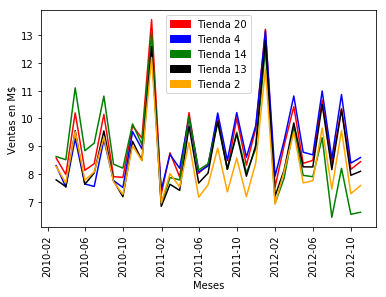

In [23]:
sales_by_store_and_date = clean_walmart_data[["Store", "Date", "Weekly_Sales"]].groupby(["Store", "Date"]).sum()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Tienda 20')
blue_patch = mpatches.Patch(color='blue', label='Tienda 4')
green_patch = mpatches.Patch(color='green', label='Tienda 14')
black_patch = mpatches.Patch(color='black', label='Tienda 13')
orange_patch = mpatches.Patch(color='orange', label='Tienda 2')
store20 = plt.plot(sales_by_store_and_date.loc[20].resample('M').sum()/1000000, color="red")
store4 = plt.plot(sales_by_store_and_date.loc[4].resample('M').sum()/1000000, color="blue")
store14 = plt.plot(sales_by_store_and_date.loc[14].resample('M').sum()/1000000, color="green")
store13 = plt.plot(sales_by_store_and_date.loc[13].resample('M').sum()/1000000, color="black")
store2 = plt.plot(sales_by_store_and_date.loc[2].resample('M').sum()/1000000, color="orange")
_ = plt.xlabel('Meses')
_ = plt.ylabel('Ventas en M$')
_= plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch, orange_patch])
_= plt.xticks(rotation=90)


Como podemos ver, las ventas se intensifican muchísimo en Navidad, algo ya esperado, pero también existen otros picos de ventas diferentes. Podríamos hacer un análisis similar con el top5 de departamentos para ver si obtenemos algún resultado reseñable.

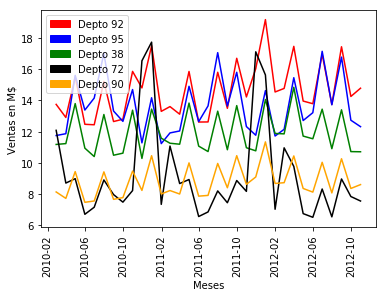

In [24]:
sales_by_dpto_and_date = clean_walmart_data[["Dept", "Date", "Weekly_Sales"]].groupby(["Dept", "Date"]).sum()
%matplotlib inline
red_dpto_patch = mpatches.Patch(color='red', label='Depto 92')
blue_dpto_patch = mpatches.Patch(color='blue', label='Depto 95')
green_dpto_patch = mpatches.Patch(color='green', label='Depto 38')
black_dpto_patch = mpatches.Patch(color='black', label='Depto 72')
orange_dpto_patch = mpatches.Patch(color='orange', label='Depto 90')
dpto92 = plt.plot(sales_by_dpto_and_date.loc[92].resample('M').sum()/1000000, color="red")
dpto95 = plt.plot(sales_by_dpto_and_date.loc[95].resample('M').sum()/1000000, color="blue")
dpto38 = plt.plot(sales_by_dpto_and_date.loc[38].resample('M').sum()/1000000, color="green")
dpto72 = plt.plot(sales_by_dpto_and_date.loc[72].resample('M').sum()/1000000, color="black")
dpto90 = plt.plot(sales_by_dpto_and_date.loc[90].resample('M').sum()/1000000, color="orange")
_ = plt.xlabel('Meses')
_ = plt.ylabel('Ventas en M$')
_= plt.legend(handles=[red_dpto_patch, blue_dpto_patch, green_dpto_patch, black_dpto_patch, orange_dpto_patch])
_= plt.xticks(rotation=90)

Tal y como se observa en la gráfica, es el departamento 72, el que incrementa de forma muy considerable sus ventas en Navidad en comparación con el resto del año.

Por último cargaremos el tercer fichero, que nos permite relacionar los datos con otros datos estadísticos interesantes, como el ratio de desempleo, la temperatura, el precio del petroleo y las rebajas hechas durante esos días (solo disponibles para datos mas alla de 2011).

In [25]:
url = "https://raw.githubusercontent.com/ccolado/master-big-data-walmart/master/walmart-data/features.csv"
features = pd.read_table(url,sep=',',parse_dates=['Date'], date_parser=dateparse)
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


Sería interesante tener en un mismo dataset tanto con estos datos como los anteriores. Para ello, vamos a unir ambas fuentes de datos en un solo dataset, y lo vamos a hacer por las columnas que tienen en comun, esto es, "Store", "Date", y "IsHoliday". También contaremos el número de filas, para estar seguros que la union de ambos no pierde filas.

In [28]:
clean_walmart_data.count()

Store             420285
Dept              420285
Date              420285
Weekly_Sales      420285
IsHoliday         420285
Date_Formatted    420285
dtype: int64

In [29]:
features.count()

Store           8190
Date            8190
Temperature     8190
Fuel_Price      8190
MarkDown1       4032
MarkDown2       2921
MarkDown3       3613
MarkDown4       3464
MarkDown5       4050
CPI             7605
Unemployment    7605
IsHoliday       8190
dtype: int64

Para añadir la información que nos facilitan sobre las tiendas y su entorno, con el número de ventas por departamento en cada tienda, haremos una especie de "merge". Vamos a poner en cada una de las filas las columnas correspondientes al fichero de "features" (datos adicionales sobre el entorno social de las tiendas), para poder sacar datos en función de la temperatura del dia, o los precios del petróleo, etc. 

Además, comprobamos que el número de filas resultante es el total que teniamos antes en el dataset de walmart.

In [32]:
dataset_merged = pd.merge(clean_walmart_data, features, on=["Store", "Date", "IsHoliday"])
dataset_merged.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Date_Formatted,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [33]:
dataset_merged.count()

Store             420285
Dept              420285
Date              420285
Weekly_Sales      420285
IsHoliday         420285
Date_Formatted    420285
Temperature       420285
Fuel_Price        420285
MarkDown1         150200
MarkDown2         110918
MarkDown3         136667
MarkDown4         134535
MarkDown5         150948
CPI               420285
Unemployment      420285
dtype: int64

Como vemos, tenemos el mismo número de filas que teníamos anteriormente en el dataset grande.

Ahora vamos a intentar sacar en una sola gráfica, las ventas medias semanales, relacionadas con, por ejemplo, el precio medio del combustible ese mes, para las 5 tiendas top de ventas, como hicimos antes. Para ello:
<ul>
<li>Vamos a sacar la media de ventas semanal por tienda de una manera muy similar a como hicimos antes</li>
<li>Haremos dos subplots, uno con el eje Y de las ventas en dólares, y otro con el precio medio del combustible</li>
<li>Lo haremos igualmente rehaciendo los datos mensualmente para tener mas limpieza a la hora de visualizar los datos</li>
</ul>
Después, repetiremos el análisis, pero por tienda.

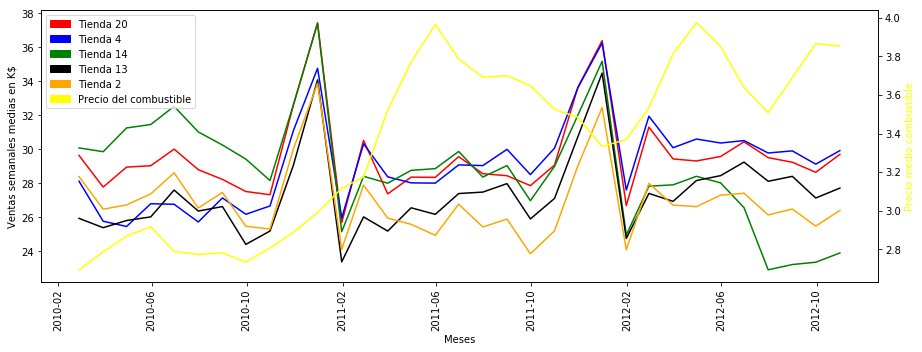

In [53]:
sales_complete_by_store_and_date = dataset_merged[["Store", "Date", "Weekly_Sales"]].groupby(["Store", "Date"]).mean()
mean_fuelprice_by_date = dataset_merged[["Date", "Fuel_Price"]].groupby(["Date"]).mean()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()
_= plt.xticks(rotation=90)
red_patch = mpatches.Patch(color='red', label='Tienda 20')
blue_patch = mpatches.Patch(color='blue', label='Tienda 4')
green_patch = mpatches.Patch(color='green', label='Tienda 14')
black_patch = mpatches.Patch(color='black', label='Tienda 13')
orange_patch = mpatches.Patch(color='orange', label='Tienda 2')
yellow_patch = mpatches.Patch(color='yellow', label='Precio del combustible')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Ventas semanales medias en K$')
store20 = plt.plot(sales_complete_by_store_and_date.loc[20].resample('M').mean()/1000, color="red")
store4 = plt.plot(sales_complete_by_store_and_date.loc[4].resample('M').mean()/1000, color="blue")
store14 = plt.plot(sales_complete_by_store_and_date.loc[14].resample('M').mean()/1000, color="green")
store13 = plt.plot(sales_complete_by_store_and_date.loc[13].resample('M').mean()/1000, color="black")
store2 = plt.plot(sales_complete_by_store_and_date.loc[2].resample('M').mean()/1000, color="orange")
ax2 = ax1.twinx()
ax2.set_ylabel('Precio medio combustible', color='yellow')
ax2.tick_params('y', colors='black')
mean_fuel_price = ax2.plot(mean_fuelprice_by_date.resample('M').mean(), color="yellow")
_= plt.legend(handles=[red_patch, blue_patch, green_patch, black_patch, orange_patch, yellow_patch])
plt.show()

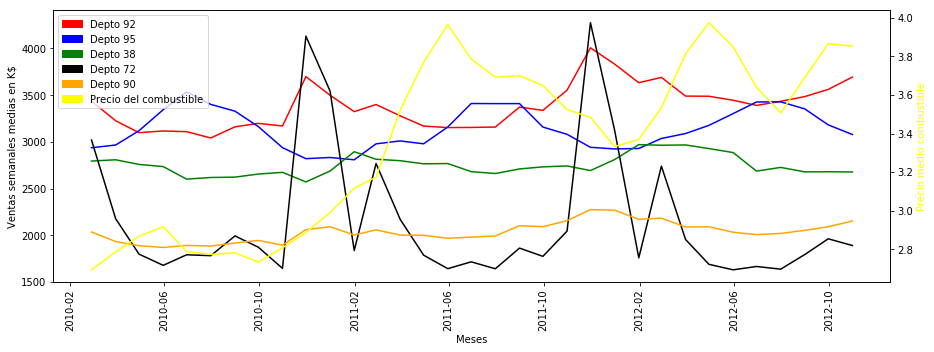

In [61]:
sales_complete_by_dpto_and_date = dataset_merged[["Dept", "Date_Formatted", "Weekly_Sales"]].groupby(["Dept", "Date_Formatted"]).sum()
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (15,5)
fig, ax1 = plt.subplots()
_= plt.xticks(rotation=90)
red_dpto_patch = mpatches.Patch(color='red', label='Depto 92')
blue_dpto_patch = mpatches.Patch(color='blue', label='Depto 95')
green_dpto_patch = mpatches.Patch(color='green', label='Depto 38')
black_dpto_patch = mpatches.Patch(color='black', label='Depto 72')
orange_dpto_patch = mpatches.Patch(color='orange', label='Depto 90')
yellow_dpto_patch = mpatches.Patch(color='yellow', label='Precio del combustible')
ax1.set_xlabel('Meses')
ax1.set_ylabel('Ventas semanales medias en K$')
dpto92 = plt.plot(sales_by_dpto_and_date.loc[92].resample('M').mean()/1000, color="red")
dpto95 = plt.plot(sales_by_dpto_and_date.loc[95].resample('M').mean()/1000, color="blue")
dpto38 = plt.plot(sales_by_dpto_and_date.loc[38].resample('M').mean()/1000, color="green")
dpto72 = plt.plot(sales_by_dpto_and_date.loc[72].resample('M').mean()/1000, color="black")
dpto90 = plt.plot(sales_by_dpto_and_date.loc[90].resample('M').mean()/1000, color="orange")
ax2 = ax1.twinx()
ax2.set_ylabel('Precio medio combustible', color='yellow')
ax2.tick_params('y', colors='black')
mean_fuel_price = ax2.plot(mean_fuelprice_by_date.resample('M').mean(), color="yellow")
_= plt.legend(handles=[red_dpto_patch, blue_dpto_patch, green_dpto_patch, black_dpto_patch, orange_dpto_patch, yellow_dpto_patch])

De este análisis exploratorio inicial, podemos ver como las ventas en el año 2011 bajaron bastante, coincidiendo con un repunte en el precio del combustible. Curiosamente, dicho repunte bajo en Navidades, cuando, ya historicamente, las ventas son mucho mayores que el resto del año. Tras navidades, las ventas bajaron coincidiendo también con otro repunte en el precio del combustible. Podríamos pensar que ambas variables estan estadísticamente relacionadas. Es por ello que vamos a dibujar una regresión lineal, y ver si realmente existe tal relación. Para hacerlo, haremos uso directamente de Seaborn, que nos permite realizar este cálculo de manera gráfica y mucho mas sencillamente.<br/>
Vamos a separar del dataset anterior lo que nos interesa, lo vamos a agrupar y sacar las medias, y después lo pintaremos con Seaborn.

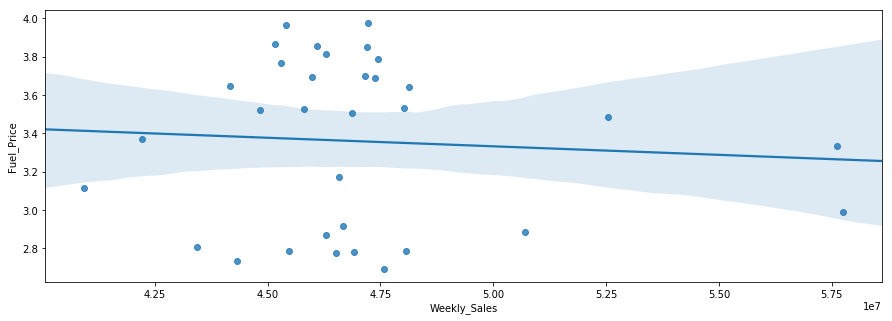

In [62]:
sales_complete_by_date = dataset_merged[["Date_Formatted", "Weekly_Sales"]].groupby(["Date_Formatted"]).sum()
sales_complete_by_date_monthly = sales_complete_by_date.resample('M').mean()
mean_fuelprice_by_date_monthly = mean_fuelprice_by_date.resample('M').mean()
fuel_sales_merged=pd.merge(sales_complete_by_date_monthly, mean_fuelprice_by_date_monthly, left_index=True, right_index=True)
import seaborn as sns
_ = sns.regplot(x="Weekly_Sales", y="Fuel_Price", data=fuel_sales_merged)

Como se puede observar, la pendiente de la linea no es muy escarpada, con lo cual podemos deducir que no existe tal relación de manera muy marcada. Podemos hacer este análisis de manera más general, e intentar relacionar las ventas con el resto de variables que tenemos disponibles:
<ul>
<li> Temperatura (la pasamos de Farenheit a Celsius)</li>
<li> Índice de paro</li>
<li> Índice de precios al consumo (CPI) </li>
</ul>

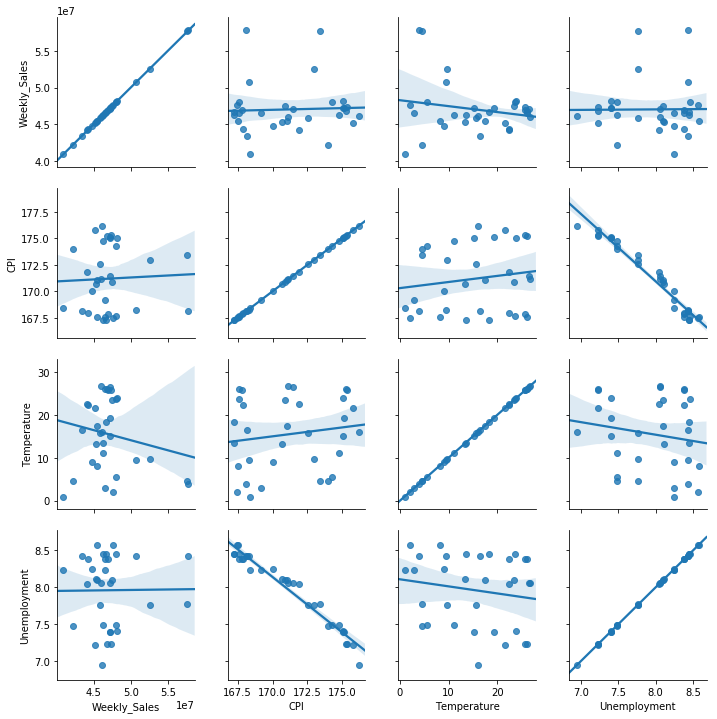

In [68]:
mean_unempployment_by_date = dataset_merged[["Date", "Unemployment"]].groupby(["Date"]).mean().resample('M').mean()
fuel_sales_unemploy_merged=pd.merge(fuel_sales_merged, mean_unempployment_by_date, left_index=True, right_index=True)
mean_cpi_by_date = dataset_merged[["Date", "CPI"]].groupby(["Date"]).mean().resample('M').mean()
fuel_sales_unemploy_cpi_merged=pd.merge(fuel_sales_unemploy_merged, mean_cpi_by_date, left_index=True, right_index=True)
mean_temperature_by_date = dataset_merged[["Date", "Temperature"]].groupby(["Date"]).mean().resample('M').mean()
mean_temperature_by_date_celsius = (mean_temperature_by_date - 32)*(5/9)
fuel_sales_unemploy_cpi_temp_merged=pd.merge(fuel_sales_unemploy_cpi_merged, mean_temperature_by_date_celsius, left_index=True, right_index=True)
fuel_sales_unemploy_cpi_temp_merged.head(3)
g = sns.PairGrid(fuel_sales_unemploy_cpi_temp_merged, vars=["Weekly_Sales", "CPI", "Temperature", "Unemployment"])
g.map(sns.regplot)

Como podemos ver, las ventas apenas tienen relación con el desempleo y el índice de precios al consumo, pero si están algo relacionadas con la temperatura. Cuanto más frío hace, la gente tiende más a ir a los centros comerciales, y las ventas suben.

Por último, podemos intentar ver gŕaficamente la relacion que tienen la cantidad de rebajas con las ventas. Para ello:

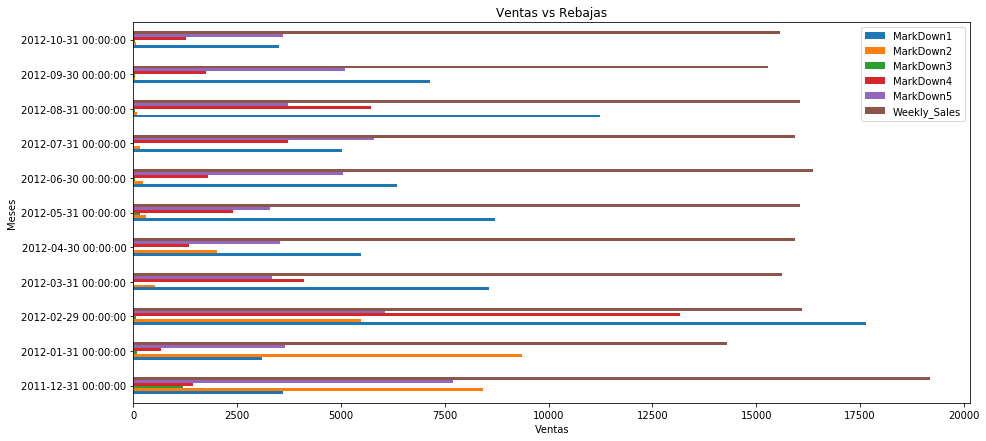

In [71]:
import time, datetime
from datetime import datetime
nov_date = datetime.fromtimestamp(time.mktime(time.strptime('2011-12-01', '%Y-%m-%d')))
walmart_with_markdown = dataset_merged[dataset_merged.Date >= nov_date]
markdown_data = walmart_with_markdown[["Date", "Weekly_Sales", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]].groupby("Date").mean().resample('M').mean()
axes = markdown_data[["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5", "Weekly_Sales"]].plot(kind="barh", title="Ventas vs Rebajas", figsize=(15,7))
axes.set_xlabel('Ventas')
axes.set_ylabel('Meses')

Como podemos ver, en Febrero hay un repunte en las ventas respecto a Enero, probablemente debido a la mucha acción promocional que se estaba llevando a cabo, en comparación con el mes anterior. El resto del año las acciones promocionales y las ventas se mantienen bastante estables en media en Walmart.

Para modelar las ventas por tienda, agruparemos los datos de los departamentos y obtendremos el dataset con el que trabajaremos para construir nuestro modelo predictivo y además crearemos una tipología de tienda en función de las ventas semanales. A saber:

> $1.500.000. Tipo A
> $1.000.000. Tipo B  (Entre 1.5 y 1.0)
>   $500.000. Tipo C (Entre 0.5 y 1.0)
<=  $500.000. Tipo D

In [120]:
def func(row):
    if row['Weekly_Sales'] > 1500000:
        return 'A'
    elif row['Weekly_Sales'] > 1000000:
        return 'B'
    elif row['Weekly_Sales'] > 500000:
        return 'C'
    else:
        return 'D'
    
sales_per_store = dataset_merged.sort_values(['Store','Dept'], ascending=True)
sales_per_store[['Store','Date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment']]
sales_per_store = sales_per_store[['Store','Date','Weekly_Sales','IsHoliday','Temperature','Fuel_Price','CPI','Unemployment']].groupby(['Store', 'Date','IsHoliday']).agg({'Weekly_Sales':'sum','Temperature':'mean','Fuel_Price':'mean','CPI':'mean','Unemployment':'mean'})
sales_per_store['SalesGroup'] = sales_per_store.apply(func, axis=1)
sales_per_store.head(3)

Weekly_Sales  Temperature  Fuel_Price         CPI  \
Store Date       IsHoliday                                                      
1     2010-02-05 False        1643690.90        42.31       2.572  211.096358   
      2010-02-12 True         1641957.44        38.51       2.548  211.242170   
      2010-02-19 False        1612831.17        39.93       2.514  211.289143   

                            Unemployment SalesGroup  
Store Date       IsHoliday                           
1     2010-02-05 False             8.106          A  
      2010-02-12 True              8.106          A  
      2010-02-19 False             8.106          A

<h1>Fase IV. Modelado</h1>

En la fase de modelado trataremos de generar un modelo que mediante las variables que conocemos nos permita predecir comportamientos de las ventas. 

Sin embargo, no debemos olvidar que que la densidad causal de las ventas es alta y puede que no tengamos las variables que nos permitan realizar dichas predicciones de manera correcta. También es cierto que los comportamientos cambian con el tiempo.

El modelo que generaremos requiere unos datos de entrenamiento. Para generar un modelo podemos utilizar varios enfoques, y utilizarmos los árboles de decisión.

Vamos a realizar el análisis usando la plataforma BigML, para hacerlo de forma más gŕafica.

Para ello, primero exportamos los datos que hemos preparado en los pasos anteriores a formato CSV, para poder importalos en BigML.

In [121]:
sales_per_store.to_csv("walmart-sales-per-store.csv", sep=',')

Con el fichero exportado, vamos a proceder a conectarnos a BigML e importar los datos.

<img src="img/01.png" >

<img src="img/02.png" >

<img src="img/03.png" >

<img src="img/04.png" >

<img src="img/07.png" >

1. Importar fichero
2. One click dataset
3. Training split 80% - 20%
4. Crear cluster

<h1>Fase V. Evaluación</h1>

Dado que tenemos el valor de venta por departamento y tienda semanal y se trata de un valor numérico, vamos a tratar de identificar unos grupos realizando clustering de ventas semanales. Esto nos permitirá clasificar las tiendas en uno de los grupos que identifiquemos y asignarles recursos en función de dicho grupo. 

Tengamos en cuenta que una tienda puede ser de un grupo en una semana y de otro grupo en otra semana.


<h1>Fase VI. Despliegue</h1>